### Imports

In [69]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data

In [2]:
colnames = ["class", "alcohol", "malicacid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "OD280_OD315_of_diluted_wines", "proline"]
wine_df = pd.read_csv("./datasets/wine/wine.data", names=colnames)

In [3]:
wine_df.head()

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Numerical data exploratory

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malicacid                     178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  proli

### Splitting dataset

separating the **label** from the features

In [5]:
X = wine_df.drop(columns=["class"])
y = wine_df["class"]

In [6]:
X.head()

,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
y.unique()

array([1, 2, 3], dtype=int64)

#### Splitting into train and validation sets

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 158 to 102
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malicacid                     142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    int64  
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  OD280_OD315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    int64  
dtypes: 

### Constructing the DecisionTree Classifier

In [134]:
model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, splitter="best", ccp_alpha=0.0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'x[9] <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.3, 0.625, 'x[12] <= 1002.5\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.2, 0.375, 'x[2] <= 3.07\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.625, 'x[6] <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.8, 0.375, 'x[12] <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.7, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

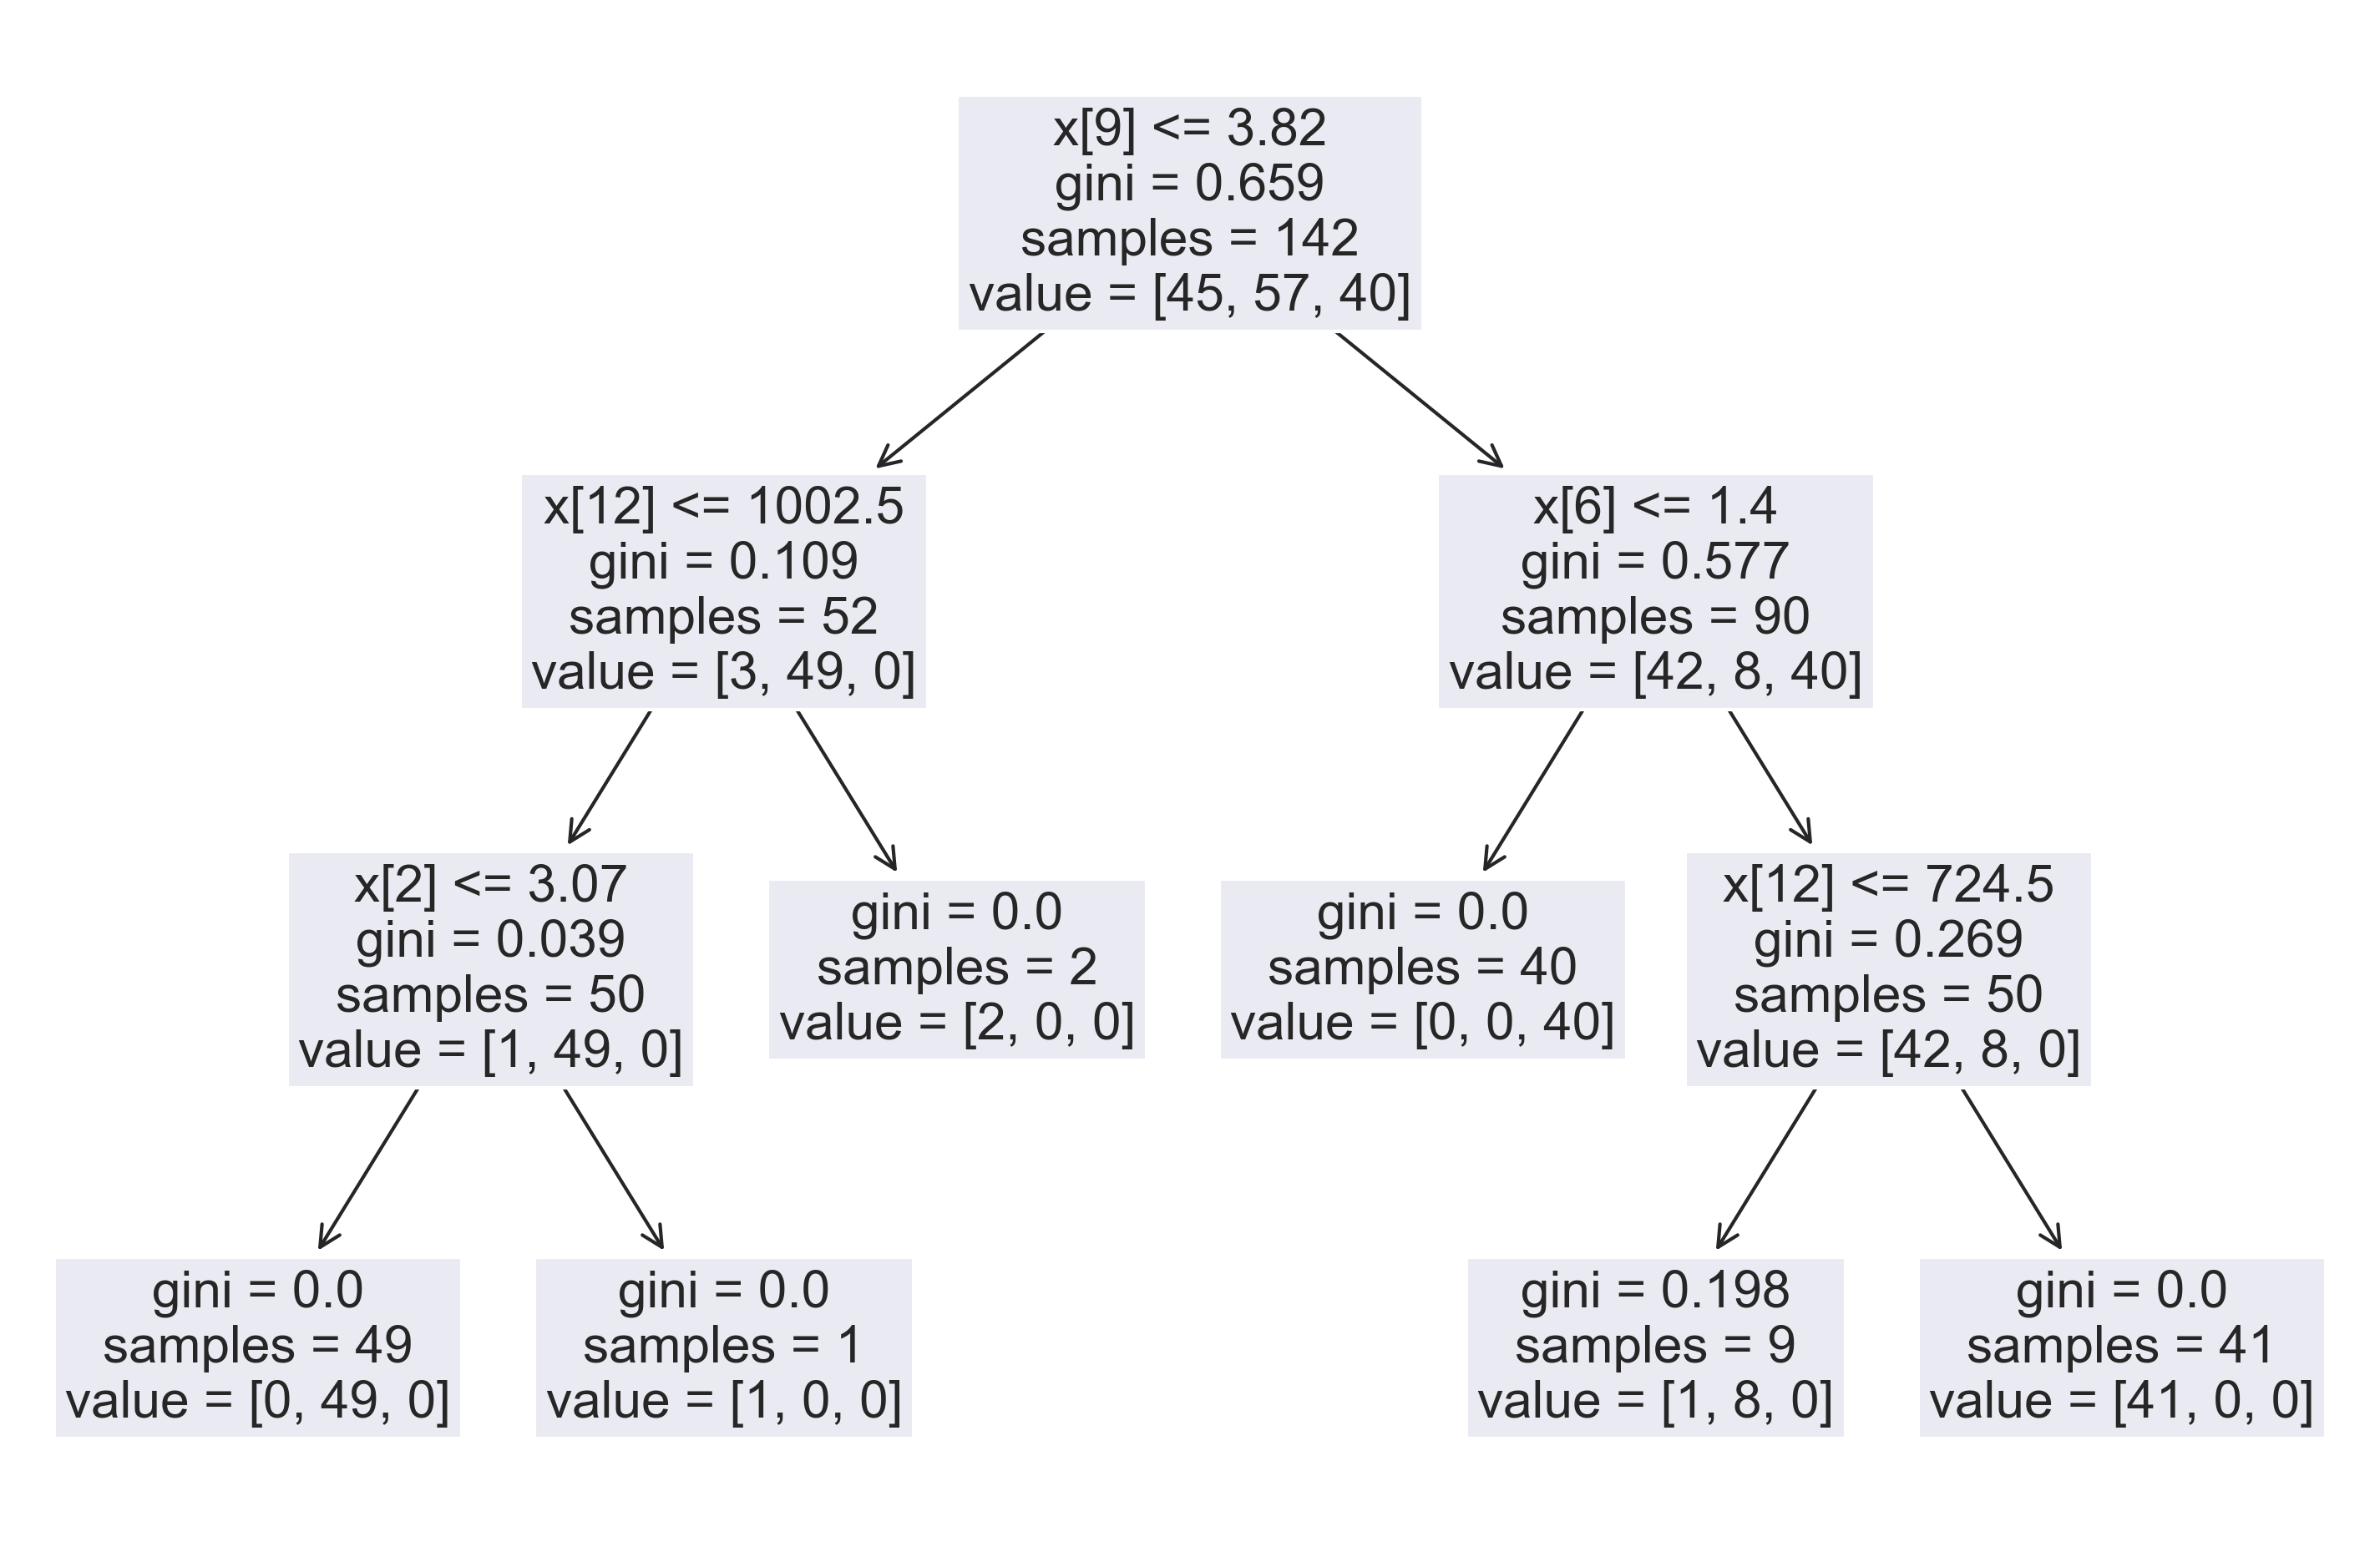

In [158]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
plot_tree(model, ax=ax)

In [136]:
# printing the prediction probabilities
prob = model.predict_proba([[13.41,3.84,2.12,18.8,90,2.45,2.68,.27,1.48,4.28,.91,3,1035]])
print(f"Prediction prob: {prob}")

# making a prediction
pred = model.predict([[13.41,3.84,2.12,18.8,90,2.45,2.68,.27,1.48,4.28,.91,3,1035]])
print(f"Prediction: {pred}")

Prediction prob: [[1. 0. 0.]]
Prediction: [1]


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Evaluating model performance on the training set

#### Using Mean Absolute Error

In [137]:
y_train_pred = model.predict(X_train)
y_train_pred

array([3, 3, 2, 3, 1, 2, 2, 2, 3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1,
       2, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 3, 2, 1, 3, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2,
       2, 1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 3, 2,
       1, 2, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 3, 1, 2, 2, 1, 2, 2], dtype=int64)

In [138]:
mse = mean_absolute_error(y_train, y_train_pred)

In [139]:
mse

0.007042253521126761

**error: 0 🤔**

#### Using confusion matrix

In [140]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[44,  1,  0],
       [ 0, 57,  0],
       [ 0,  0, 40]], dtype=int64)

**NB:** Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

### Evaluating model performance on the Validation (Test) Set

Accuracy, Precision, Recall and F1 score

In [141]:
# make predictions on the validation set
y_test_pred = model.predict(X_test)

#### Plotting the confusion matrix

In [142]:
c_matrix = confusion_matrix(y_test, y_test_pred)
c_matrix

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 0,  1,  7]], dtype=int64)

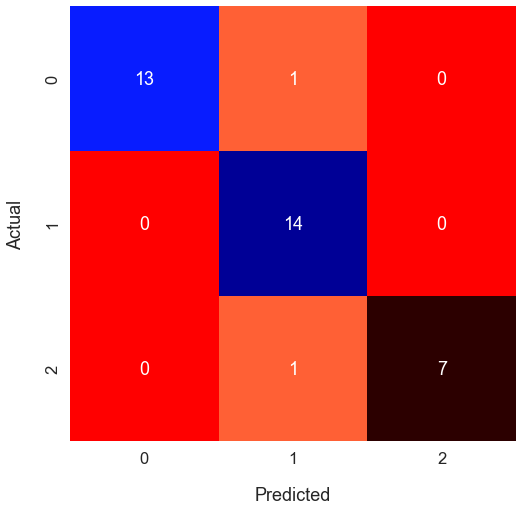

In [157]:
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    c_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap="flag", # customize color map
    vmax=135 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

Based on the confusion matrix, determine the class pair that is frequently misclassified.

#### Accuracy
It calculates the percentage of correctly classified instances out of the total number of instances in the dataset. Accuracy is a widely used metric, especially when the class distribution is balanced. 

In [159]:
accuracy = accuracy_score(y_test, y_test_pred)

In [160]:
accuracy

0.9444444444444444

#### Precison
Precision is the measure of how many correctly predicted positive instances (true positives) there are out of all instances predicted as positive (true positives + false positives). Precision focuses on the accuracy of positive predictions. It helps determine the proportion of positive predictions that are actually correct.

In [161]:
precision = precision_score(y_test, y_test_pred, average="weighted")

In [162]:
precision

0.9513888888888888

#### Recall
Recall, also known as sensitivity or true positive rate, measures the ability of a model to correctly identify positive instances. It calculates the ratio of true positives to the sum of true positives and false negatives. Recall focuses on the proportion of actual positive instances that are correctly predicted as positive.

In [163]:
recall = recall_score(y_test, y_test_pred, average="weighted")

In [164]:
recall

0.9444444444444444

#### F1 Score
The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall simultaneously. The F1 score is useful when there is an uneven class distribution or when both false positives and false negatives need to be minimized. It ranges from 0 to 1, with a value of 1 indicating the best possible performance.

In [165]:
f1 = f1_score(y_test, y_test_pred, average="weighted")
print(f1)

0.9448559670781894


In [166]:
print(f"Accuracy = {accuracy.round(4)}")
print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")
print(f"F1 Score = {f1.round(4)}")

Accuracy = 0.9444
Precision = 0.9514
Recall = 0.9444
F1 Score = 0.9449


Finding the indices of missclassified instances

In [73]:
misclassified_indices = [i for i in range(len(y_test)) if y_test.iloc[i] != y_test_pred[i]]

In [74]:
misclassified_indices

[10, 11]

Analyzing the decision the sequence of decisions that lead to the misclassification.

In [75]:
misclassified_index = 10
misclassified_instance = X_test.iloc[misclassified_index]

node_indicator = model.decision_path([misclassified_instance])
node_index = node_indicator.indices

# Retrieve the attribute decisions made along the path
attribute_decisions = [model.tree_.feature[node] for node in node_index[:-1]]
attribute_decisions

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[9, 12, 2]

In the context of decision trees, the `attribute_decisions` list represents the sequence of attribute decisions made along the decision path that led to the misclassification of an instance. Each element in the list corresponds to the index of the feature (attribute) used for the decision at that particular node.

For example, if you have attribute_decisions = [9, 12, 2], it means that the misclassified instance followed the decision path in the decision tree, and the attribute decisions were made based on the following features (attributes):

- At the first node, the decision was made based on the 10th feature (assuming a zero-based index, as in Python) of your dataset.
- At the second node, the decision was made based on the 13th feature.
- At the third node (the penultimate node in the path), the decision was made based on the 3rd feature.

These attribute decisions represent the conditions that were evaluated to determine the subsequent splits in the decision tree. 
Each decision corresponds to a feature or attribute of your dataset, and the specific attribute value was compared against a threshold to determine the path taken through the tree.

Identifying the corresponding leaf node(s)

In [80]:
leaf_node = node_index[-1]
print(leaf_node)

predicted_class = model.classes_[model.tree_.value[leaf_node].argmax()]
predicted_class

3


2

In [79]:
y_test_pred[10]

2